# Project: Investigate a Dataset (Medical Appointment No Shows)
## Selected dataset: No-show appointments

## Introduction
in this a data set of appointment records in public hospital at vitoria, brazil in investigated. the reason why the patiant did,nt shop up attracts our attention . this data sets contains records whether patiants miss oppintment, attributes of patiants and information about oppintments. the data set is provided on kaggle.
given the information and attributes about patiants and her/his scheduled appointment, how likely is he/she to show up to the appointment as scheduled?
throughout this project, we tring to answer this question by exploring the data set and also connections among variables.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv(r"C:\Users\Ahmed Hesham\Desktop\udactiy2\KaggleV2-May-2016.csv")
print("data read successfully")

data read successfully


## data wrangling 
  ### data assessment

In [3]:
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.info(),
print('-------------')
print('Dataframe contains {} rows and {} columns'.format(df.shape[0],df.shape[1]))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB
-------------
Dataframe contains 110527 rows and 14 columns


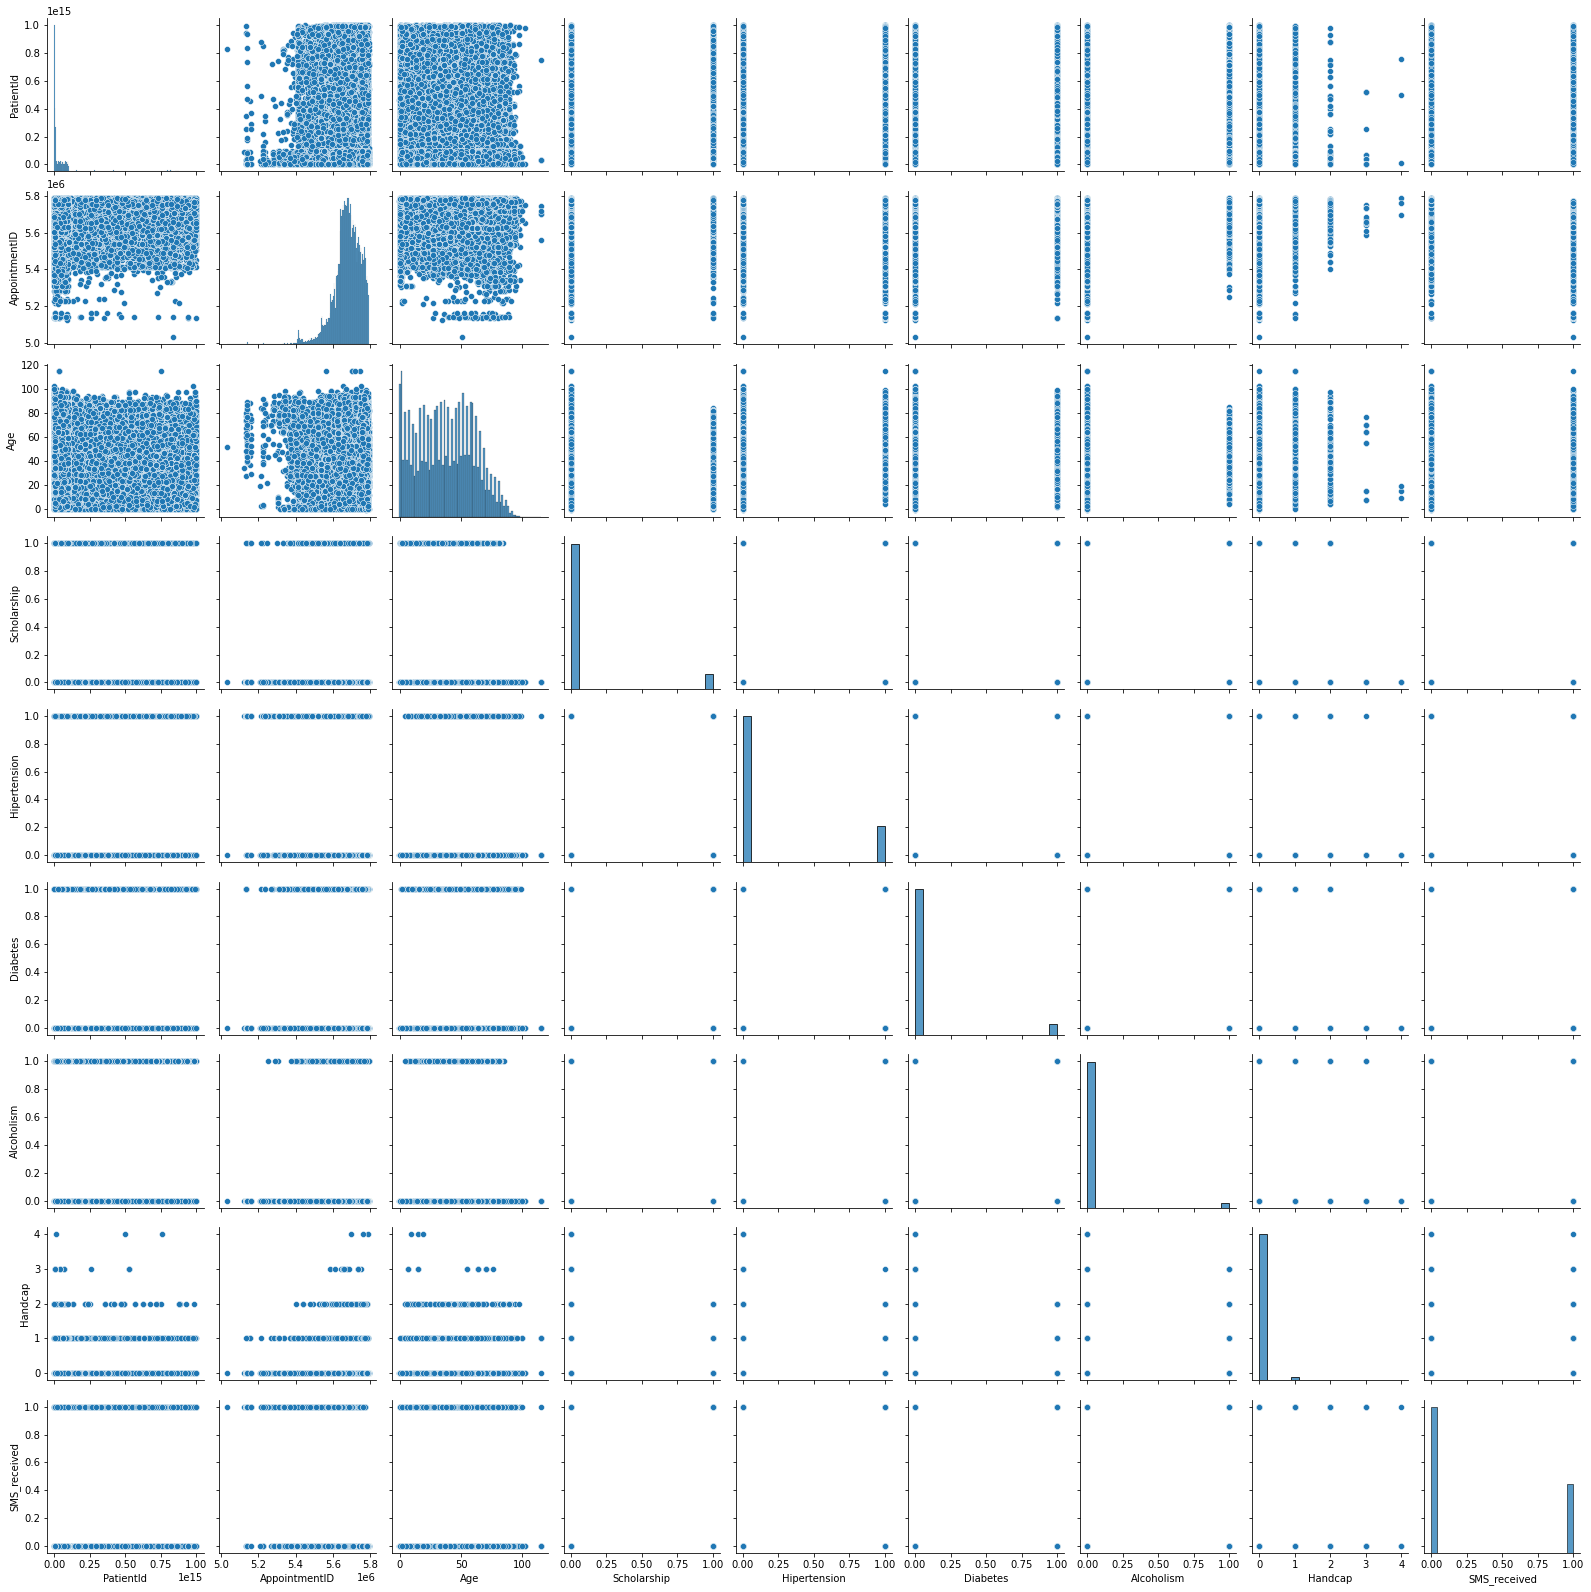

In [5]:
sns.pairplot(df);

In [6]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### Taking a look at the heatmap, it looks that there is a degree of corrolation among Age and Hypertension, and to a less extent, among Hypertension and Diabetes.
### Looking at the charts, we find the data frame contains the two categories of data:

### 1- Categorical Data: Gender, Diabetes, Alcoholism, Handcap, SMS_received, No-show
### 2- Quantitative Data: PatientId, AppointmentID, Age, ScheduledDay, AppointmentDay

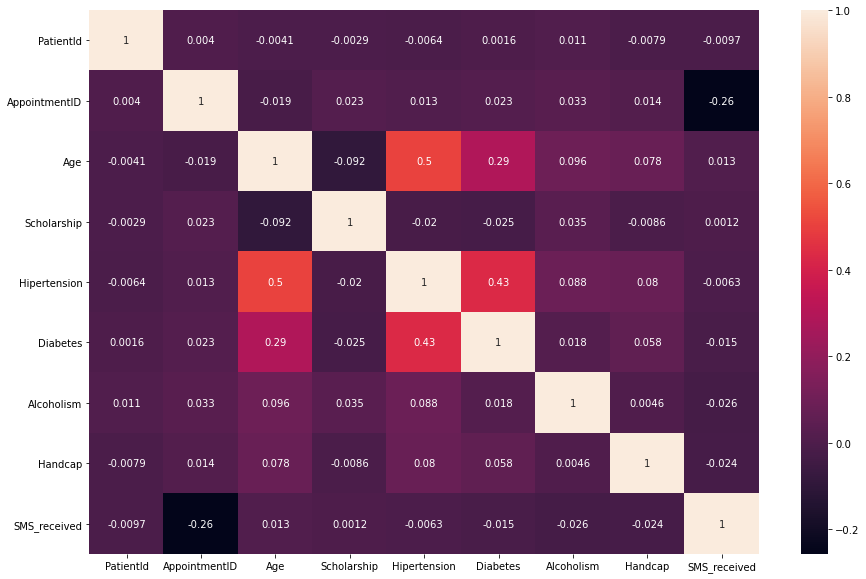

In [7]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(), ax=ax, annot=True);

In [8]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
sum(df.AppointmentID.duplicated())

0

In [11]:
sum(df.PatientId.duplicated())

48228

In [12]:
df.PatientId.value_counts().head(5)

8.221459e+14    88
9.963767e+10    84
2.688613e+13    70
3.353478e+13    65
2.584244e+11    62
Name: PatientId, dtype: int64

In [13]:
df[df.PatientId <= 0]['PatientId']

Series([], Name: PatientId, dtype: float64)

In [14]:
df[df.AppointmentID < 0]['AppointmentID']

Series([], Name: AppointmentID, dtype: int64)

In [15]:
df['Age'].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1],
      dtype=int64)

In [16]:
df[df.Age < 0]['Age']

99832   -1
Name: Age, dtype: int64

In [17]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


# data cleaning 
some columns are redundant
some one has age -1

In [18]:
df.drop(['PatientId','AppointmentID','ScheduledDay','AppointmentDay','Neighbourhood'], axis = 1, inplace = True)

## Fixing Column name

In [19]:
df.columns = ['Gender', 'Age', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'Showed']

In [20]:
df.head()

,Gender,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Showed
0,F,62,0,1,0,0,0,0,No
1,M,56,0,0,0,0,0,0,No
2,F,62,0,0,0,0,0,0,No
3,F,8,0,0,0,0,0,0,No
4,F,56,0,1,1,0,0,0,No


### changing the yes value to false and no value to True

In [21]:
df['Showed'].replace(to_replace=('No'),value=True , inplace=True)
df['Showed'].replace(to_replace=('Yes'),value=False, inplace=True)

# deleting Age -1

In [22]:
df.drop(index=99832,inplace=True)
df.query('Age==-1')

,Gender,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Showed


# modifying values greater than one in Handcap to be 1

In [23]:
df.Handicap.replace(to_replace=(2,3,4,5,6,7),value=1 , inplace=True)
(df.Handicap > 1).sum()

0

#  Exploratory Data Analysis

### who is more affected by alcohol problems , male or female?

In [64]:
def myGroupbyPlot(df,x,y,k):
    return df.groupby(x)[y].mean().plot(kind= str(k) ,ylabel= str(y));

In [25]:
df.groupby('Gender').Alcoholism.mean()

Gender
F    0.017024
M    0.055238
Name: Alcoholism, dtype: float64

### Is age coorelated to diabetes?

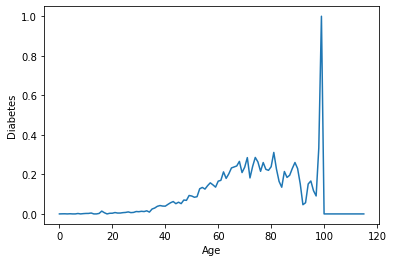

In [65]:
myGroupbyPlot(df,'Age','Diabetes','line');

##### yes age is coorlated to diabetes

### Are handicapped people less likely to show up?

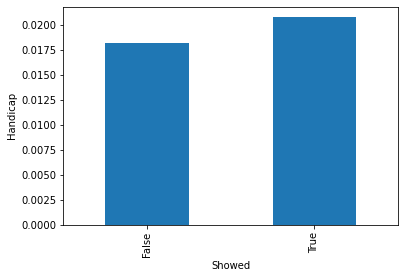

In [66]:
myGroupbyPlot(df,'Showed','Handicap','bar');

#### yes handicapped are related with show up

### Are you more likely to get hypertension when you get older?

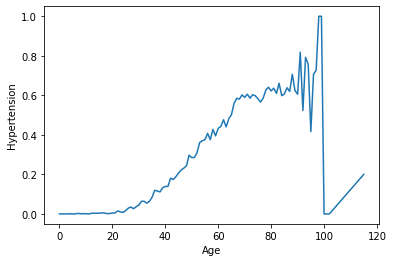

In [67]:
myGroupbyPlot(df,'Age','Hypertension','line');

#### probably yes

### who has more hypertension , male or female?

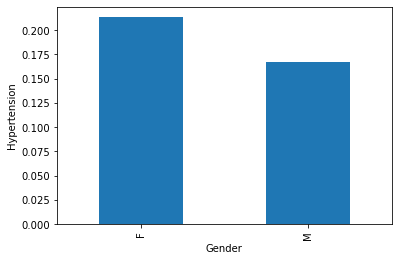

In [68]:
myGroupbyPlot(df,'Gender','Hypertension','bar');

#### probably females

In [30]:
df.groupby('Gender').Hypertension.mean()

Gender
F    0.213519
M    0.167033
Name: Hypertension, dtype: float64

### Which gender is more likely to have more health problems, male or female?

In [31]:
Total_conditions=df.Hypertension+df.Handicap+df.Diabetes+df.Alcoholism
df['Total_conditions'] = Total_conditions

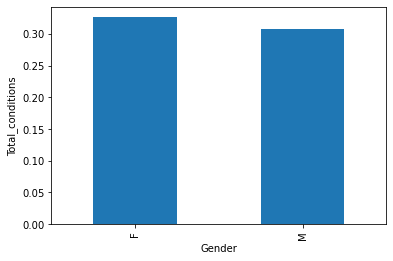

In [70]:
myGroupbyPlot(df,'Gender','Total_conditions','bar');

#### probably females

# Conclusion

## Results:
### 1st conclusion is that males are more at risk from alcoholism than females, in our data set they were more than 2x more likely to develop it
### 2nd conclusion is that age coorelates with having diabetes so the more you age up the more at risk you are from diabetes
### 3rd conclusion although some people are handicapped it still didn't affect showing up to their appointments
### 4th conclusion you are more likely to get hypertension when you get older 
### 5th conclusion females are more likely to get hypertention than males

## limitations:
### I couldnt find a significant difference between the total conditions of males and females thus we cant draw a definite conclusion from our findings and more data will be needed to confirm the coorelation
